In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv("customer_transformed_data.csv")
data_labels = pd.read_csv("train_labels.csv")

In [5]:
data_w_labels = data.merge(data_labels, how = 'inner', on='customer_ID')

In [6]:
data_w_labels.head()

,Unnamed: 0,customer_ID,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,...,D_64_count,D_64_last,D_64_nunique,D_66_count,D_66_last,D_66_nunique,D_68_count,D_68_last,D_68_nunique,target
0,0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.024194,0.868580,0.960384,0.934745,0.010704,0.024444,0.001082,...,13,O,1,0,NaN,0,13,6.0,1,0
1,1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899820,0.022119,0.861109,0.929122,0.880519,0.215205,0.199150,0.002224,...,13,O,1,0,NaN,0,13,6.0,1,0
2,2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878454,0.028911,0.797670,0.904482,0.880875,0.004181,0.002758,0.000802,...,13,R,1,0,NaN,0,13,6.0,1,0
3,3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.598969,0.020108,0.567442,0.623392,0.621776,0.048862,0.088466,0.000660,...,13,O,1,0,NaN,0,13,3.0,3,0
4,4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891679,0.042325,0.805045,0.940382,0.871900,0.004644,0.002882,0.000030,...,13,O,1,13,1.0,1,13,6.0,1,0


In [7]:
# drop unnamed column
data_w_labels = data_w_labels.drop('Unnamed: 0', axis=1)

In [8]:
data_w_labels.head()

,customer_ID,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,...,D_64_count,D_64_last,D_64_nunique,D_66_count,D_66_last,D_66_nunique,D_68_count,D_68_last,D_68_nunique,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.024194,0.868580,0.960384,0.934745,0.010704,0.024444,0.001082,0.091505,...,13,O,1,0,NaN,0,13,6.0,1,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899820,0.022119,0.861109,0.929122,0.880519,0.215205,0.199150,0.002224,0.567403,...,13,O,1,0,NaN,0,13,6.0,1,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878454,0.028911,0.797670,0.904482,0.880875,0.004181,0.002758,0.000802,0.009704,...,13,R,1,0,NaN,0,13,6.0,1,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.598969,0.020108,0.567442,0.623392,0.621776,0.048862,0.088466,0.000660,0.268476,...,13,O,1,0,NaN,0,13,3.0,3,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891679,0.042325,0.805045,0.940382,0.871900,0.004644,0.002882,0.000030,0.008680,...,13,O,1,13,1.0,1,13,6.0,1,0


In [9]:
cat_features = ["B_30_last","B_38_last","D_114_last","D_116_last","D_117_last","D_120_last","D_126_last"
                ,"D_63_last","D_64_last","D_66_last","D_68_last"]

In [18]:
x_train = data_w_labels.drop(['customer_ID'], axis=1)
print(x_train.head())
# one hot encode x_train
lc = LabelEncoder()
x_train[cat_features] = x_train[cat_features].apply(lc.fit_transform)
print(x_train.head())

   P_2_mean   P_2_std   P_2_min   P_2_max  P_2_last  D_39_mean  D_39_std  \
0  0.933824  0.024194  0.868580  0.960384  0.934745   0.010704  0.024444   
1  0.899820  0.022119  0.861109  0.929122  0.880519   0.215205  0.199150   
2  0.878454  0.028911  0.797670  0.904482  0.880875   0.004181  0.002758   
3  0.598969  0.020108  0.567442  0.623392  0.621776   0.048862  0.088466   
4  0.891679  0.042325  0.805045  0.940382  0.871900   0.004644  0.002882   

   D_39_min  D_39_max  D_39_last  ...  D_64_count  D_64_last  D_64_nunique  \
0  0.001082  0.091505   0.009119  ...          13          O             1   
1  0.002224  0.567403   0.178126  ...          13          O             1   
2  0.000802  0.009704   0.009704  ...          13          R             1   
3  0.000660  0.268476   0.001083  ...          13          O             1   
4  0.000030  0.008680   0.005573  ...          13          O             1   

   D_66_count  D_66_last  D_66_nunique  D_68_count  D_68_last  D_68_nuniqu

In [19]:
dvs = data_validation_service(x_train)
dvs.get_columns_with_null_percentage()
columns_to_drop = dvs.get_columns_where_null_percentage_exceeds(.1)
dvs.drop_column(columns_to_drop)

In [20]:
x_train = dvs.df

In [21]:
x_train = x_train.dropna(axis=0)

In [22]:
x_train

,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,D_39_last,...,D_64_count,D_64_last,D_64_nunique,D_66_count,D_66_last,D_66_nunique,D_68_count,D_68_last,D_68_nunique,target
0,0.933824,0.024194,0.868580,0.960384,0.934745,0.010704,0.024444,0.001082,0.091505,0.009119,...,13,1,1,0,2,0,13,6,1,0
1,0.899820,0.022119,0.861109,0.929122,0.880519,0.215205,0.199150,0.002224,0.567403,0.178126,...,13,1,1,0,2,0,13,6,1,0
2,0.878454,0.028911,0.797670,0.904482,0.880875,0.004181,0.002758,0.000802,0.009704,0.009704,...,13,2,1,0,2,0,13,6,1,0
3,0.598969,0.020108,0.567442,0.623392,0.621776,0.048862,0.088466,0.000660,0.268476,0.001083,...,13,1,1,0,2,0,13,3,3,0
4,0.891679,0.042325,0.805045,0.940382,0.871900,0.004644,0.002882,0.000030,0.008680,0.005573,...,13,1,1,13,1,1,13,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,0.848750,0.041969,0.730505,0.895553,0.844229,0.119236,0.195278,0.002237,0.589866,0.447585,...,13,3,1,13,1,1,13,6,1,0
458909,0.859327,0.012425,0.831279,0.868121,0.831279,0.066421,0.123937,0.007327,0.478106,0.033670,...,13,2,1,0,2,0,13,6,1,0
458910,0.786838,0.014312,0.756983,0.802953,0.800522,0.221548,0.182743,0.000223,0.536278,0.267018,...,13,3,1,0,2,0,13,5,1,0
458911,0.804454,0.037442,0.754129,0.856981,0.754129,0.030878,0.081779,0.001332,0.300991,0.008619,...,13,3,2,0,2,0,13,3,2,1


In [29]:
y_train = x_train['target']
x_train = x_train.drop(['target'], axis=1)
y_train

0         0
1         0
2         0
3         0
4         0
         ..
458908    0
458909    0
458910    0
458911    1
458912    0
Name: target, Length: 387475, dtype: int64

### FEATURE SELECTION 
With a ton of attributes, we want to prune these down to reduce overfitting + model training time.

In [31]:
fs_svc = data_feature_transformation_service_classification(x_train, y_train)

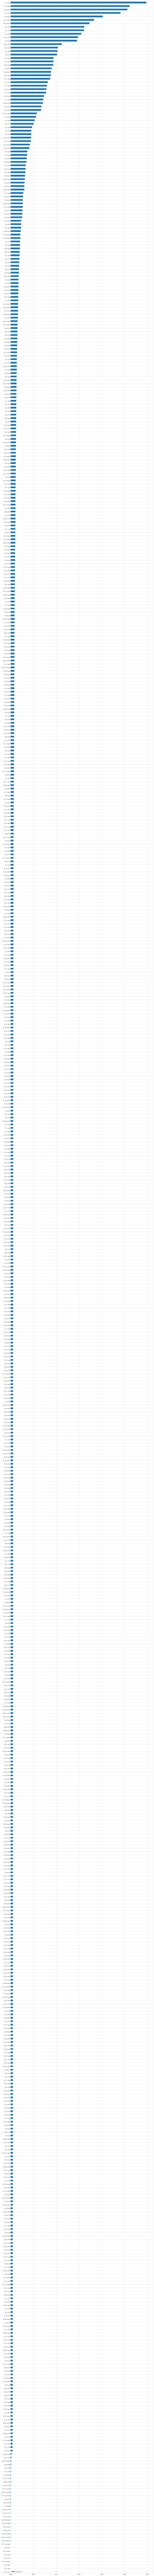

In [32]:
fs_svc.get_random_forest_feature_importance()

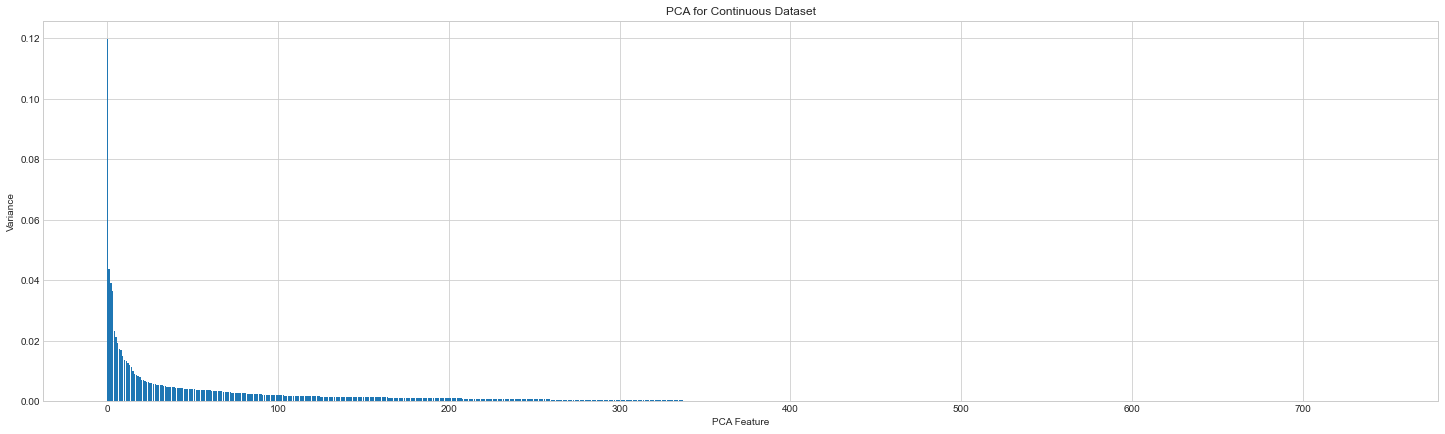

In [34]:
fs_svc.get_PCA_variance_importance()

In [ ]:
fs_svc.get_recursive_feature_elimination()